In [1]:
import numpy as np
from astropy.io import ascii
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
trimmed15 = 'MESA-Web_Job_0320100813/trimmed_history.data' #15 solar masses
trimmed8 = 'MESA-Web_Job_0320100857/trimmed_history.data' #8 solar masses
trimmed3 = 'MESA-Web_Job_0320100916/trimmed_history.data' #.
trimmed1 = 'MESA-Web_Job_0320100939/trimmed_history.data' #.
trimmedpt5 = 'MESA-Web_Job_0320101029/trimmed_history.data' #.

In [3]:
mass_all = np.zeros(5)
logR_all = np.zeros(5)
logL_all = np.zeros(5)
logT_all = np.zeros(5)

In [4]:
def get_ZAMS_params(file):
    hist = np.loadtxt(file, skiprows = 6)
    HI = hist[:,9]
    mass = hist[:,2]
    logL = hist[:,3]
    logR = hist[:,4]
    logT = hist[:,5]
    flag = (HI[0]-HI>3E-3)
    #index where hydrogen in core starts decreasing
    first_fusion = np.where(flag)[0][0]
    print(first_fusion)
    return mass[first_fusion], logL[first_fusion], logR[first_fusion], logT[first_fusion]

In [5]:
file_list = [trimmedpt5, trimmed1, trimmed3, trimmed8, trimmed15]
for i in range(len(file_list)):
    mass_all[i], logL_all[i], logR_all[i], logT_all[i] = get_ZAMS_params(file_list[i])    
    
#Below indices are printed from lowest to greatest mass
#corresponding profile numbers from profiles.index files are:
#for .5:17
#for 1: 17
#for 3: 20
#for 8: 20
#for 15: 21

763
776
909
907
949


[ 0.69863393 -0.08617148]


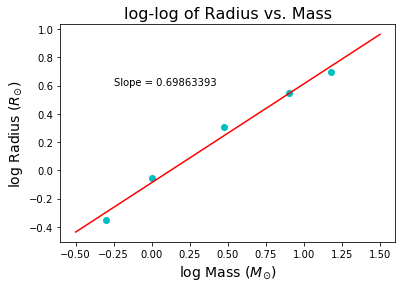

In [6]:
f = np.polyfit(np.log10(mass_all), logR_all, 1)

x = np.linspace(-0.5, 1.5, 1000)
v = np.polyval(f,x)
plt.plot(np.log10(mass_all), logR_all, 'co') #log log radius v mass
plt.title('log-log of Radius vs. Mass', fontsize = 16)
plt.xlabel('log Mass ($M_{\odot}$)', fontsize = 14)
plt.ylabel('log Radius ($R_{\odot}$)', fontsize = 14)
plt.plot(x,v,'r',label = 'Best fit')
print(f)
plt.text(-.25, .6, 'Slope = 0.69863393')

The accepted value for the slope of the mass-radius relation is 0.8, which our slope is close to source: David Darling

[ 3.89611973 -0.14562752]


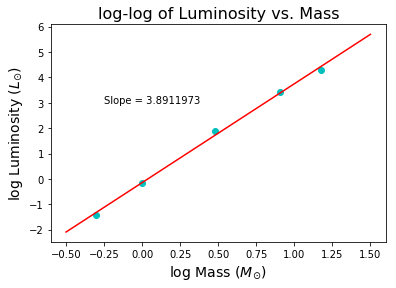

In [7]:
f = np.polyfit(np.log10(mass_all), logL_all, 1)
v = np.polyval(f,x)
x = np.linspace(-0.5, 1.5, 1000)
plt.plot(np.log10(mass_all), logL_all, 'co') #log log Luminosity v mass
plt.title('log-log of Luminosity vs. Mass', fontsize = 16)
plt.xlabel('log Mass ($M_{\odot}$)', fontsize = 14)
plt.ylabel('log Luminosity ($L_{\odot}$)', fontsize = 14)
plt.plot(x,v,'r',label = 'Best fit')
print(f)
plt.text(-.25, 3, 'Slope = 3.8911973')

The accepted value for the mass luminosity relation is 3.5 for main sequence stars, which our value is again close to (Hyperphysics).

In [8]:
trimmed15profs = 'MESA-Web_Job_0320100813/profile21.data'
trimmed8profs = 'MESA-Web_Job_0320100857/profile20.data'
trimmed3profs = 'MESA-Web_Job_0320100916/profile20.data'
trimmed1profs = 'MESA-Web_Job_0320100939/profile17.data'
trimmedpt5profs = 'MESA-Web_Job_0320101029/profile17.data'
M15, R15, L15, P15, logT15 = np.loadtxt(trimmed15profs,usecols=(0,1,2,3,5),unpack=True,skiprows=6)
M8, R8, L8, P8, logT8 = np.loadtxt(trimmed8profs,usecols=(0,1,2,3,5),unpack=True,skiprows=6)
M3, R3, L3, P3, logT3 = np.loadtxt(trimmed3profs,usecols=(0,1,2,3,5),unpack=True,skiprows=6)
M1, R1, L1, P1, logT1 = np.loadtxt(trimmed1profs,usecols=(0,1,2,3,5),unpack=True,skiprows=6)
Mpt5, Rpt5, Lpt5, Ppt5, logTpt5 = np.loadtxt(trimmedpt5profs,usecols=(0,1,2,3,5),unpack=True,skiprows=6)

(0, 1)

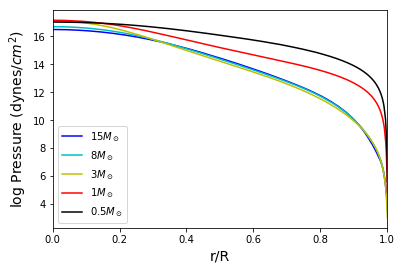

In [9]:
#P vs r/R
plt.figure()
plt.plot(R15/max(R15),np.log10(P15),'b-',label = '15$M_\odot$')
plt.plot(R8/max(R8),np.log10(P8),'c-',label = '8$M_\odot$')
plt.plot(R3/max(R3),np.log10(P3),'y-',label = '3$M_\odot$')
plt.plot(R1/max(R1),np.log10(P1),'r-',label = '1$M_\odot$')
plt.plot(Rpt5/max(Rpt5),np.log10(Ppt5),'k-',label = '0.5$M_\odot$')
plt.xlabel('r/R',fontsize = 14)
plt.ylabel('log Pressure (dynes/$cm^2$)', fontsize = 14)
plt.legend()
plt.xlim(0,1)

(0, 1)

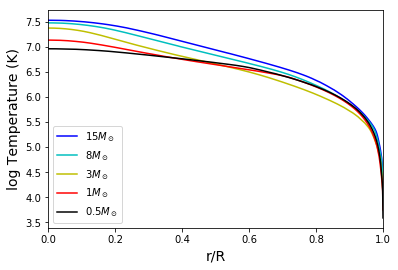

In [10]:
#T vs r/R
plt.figure()
plt.plot(R15/max(R15),logT15,'b-',label = '15$M_\odot$')
plt.plot(R8/max(R8),logT8,'c-',label = '8$M_\odot$')
plt.plot(R3/max(R3),logT3,'y-',label = '3$M_\odot$')
plt.plot(R1/max(R1),logT1,'r-',label = '1$M_\odot$')
plt.plot(Rpt5/max(Rpt5),logTpt5,'k-',label = '0.5$M_\odot$')
plt.xlabel('r/R', fontsize = 14)
plt.ylabel('log Temperature (K)',fontsize = 14)
plt.legend(loc='lower left')
plt.xlim(0,1)

The last two plots were interesting, pressure vs. radius was not at all what i had expected. I expected for higher mass stars to have higher pressures. The opposite is true, actually, lower mass stars have higher pressures, according to the MESA profiles corresponding to the start of fusion in these stars (so the "only" elements in the star should be hydrogen, and maybe a bit of helium. The reason for this may be that because of their high mass, larger stars have to stay less compact to not become unstable (guessing here). Both curves show a quick decreases in pressure and temperature at around 0.9 radii of the star where the density drops off tremendously. 

# Start of Part 2

In [122]:
class star: 
    def __init__(self,file,name,name2):
        hist = np.loadtxt(file,skiprows=6)
        self.HI = hist[:,9]
        self.mass = hist[:,2]
        self.logL = hist[:,3]
        self.logR = hist[:,4]
        self.logT = hist[:,5]
        self.Tc = hist[:,6]
        self.pc = hist[:,7]
        self.He = hist[:,11]
        self.age = hist[:,1]
        self.logage = np.log10(hist[:,1])
        self.C = hist[:,12]
        self.name = name
        self.name2 = name2
        flag = (self.HI[0]-self.HI>3E-3)
        self.first_fusion = np.where(flag)[0][0]
        flag = (self.C - self.C[0] > 3E-3)
        try:
            self.he_fusion = np.where(flag)[0][0]
        except:
            print('no helium fustion in star', self.name)
    def plotHR(self):
        plt.plot(self.logT[self.first_fusion:], self.logL[self.first_fusion:], label = self.name)
        plt.plot(self.logT[self.first_fusion], self.logL[self.first_fusion],'o',markersize = 10, label = '__nolegend__')
        try:
            plt.plot(self.logT[self.he_fusion],self.logL[self.he_fusion],'x',markersize = 10, label = '__nolegend__')
        except:
            print('no helium fusion to mark', self.name)
    def SayAge(self):
        print('The', self.name2, 'star has a lifetime of', max(self.age), 'years')
    def plotRadiusAge(self):
        plt.plot(self.logage[self.first_fusion:], self.logR[self.first_fusion:], label = self.name)
    def plottcpc(self):
        plt.plot(self.pc[self.first_fusion:],self.Tc[self.first_fusion:], label = self.name)
        plt.plot(self.pc[self.first_fusion:], (self.pc[self.first_fusion:]**(2/3))*(np.log10(1261)), 'k--', label = '__nolegend__')
        #plt.plot(self.pc[self.first_fusion:], 8.9-(self.pc[self.first_fusion:]*.113), 'k--', label = '__nolegend__')

In [123]:
mpt5 = star(file_list[0],'0.5$M_\odot$','0.5 solar mass')
m1 = star(file_list[1], '1$M_\odot$', '1 solar mass')
m3 = star(file_list[2], '3$M_\odot$', '3 solar mass')
m8 = star(file_list[3], '8$M_\odot$', '8 solar mass')
m15 = star(file_list[4], '15$M_\odot$', '15 solar mass')

no helium fustion in star 0.5$M_\odot$
no helium fustion in star 1$M_\odot$


no helium fusion to mark 0.5$M_\odot$
no helium fusion to mark 1$M_\odot$


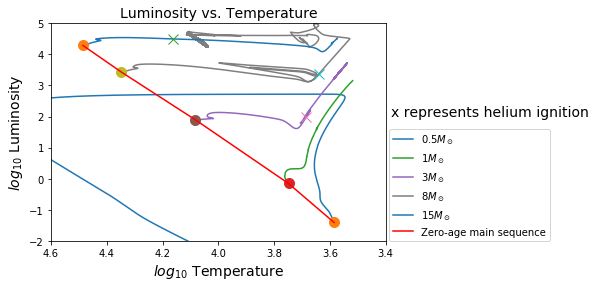

In [116]:
plt.figure()
mpt5.plotHR()
m1.plotHR()
m3.plotHR()
m8.plotHR()
m15.plotHR()
plt.plot(logT_all, logL_all, 'r-', label = 'Zero-age main sequence')
plt.gca().invert_xaxis()
plt.ylabel('$log_{10}$ Luminosity',fontsize = 14)
plt.xlabel('$log_{10}$ Temperature', fontsize = 14)
plt.legend(loc = (1.01,0))
plt.title('Luminosity vs. Temperature', fontsize = 14)
plt.xlim(4.6, 3.4)
plt.ylim(-2,5)
plt.text(3.38,2, 'x represents helium ignition', fontsize = 14)

In [108]:
mpt5.SayAge()
m1.SayAge()
m3.SayAge()
m8.SayAge()
m15.SayAge()
#These are the ages of stars from the start of the simulation to end

The 0.5 solar mass star has a lifetime of 181559762360.66498 years
The 1 solar mass star has a lifetime of 12416488864.51867 years
The 3 solar mass star has a lifetime of 456726888.9777111 years
The 8 solar mass star has a lifetime of 33375272.4737587 years
The 15 solar mass star has a lifetime of 10219594.786349064 years


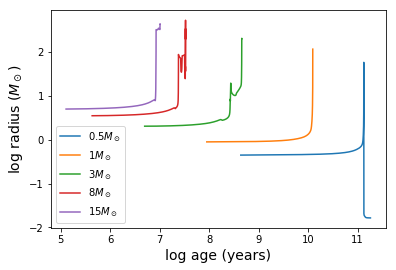

In [113]:
plt.figure()
mpt5.plotRadiusAge()
m1.plotRadiusAge()
m3.plotRadiusAge()
m8.plotRadiusAge()
m15.plotRadiusAge()
plt.xlabel('log age (years)', fontsize = 14)
plt.ylabel('log radius ($M_\odot$)',fontsize = 14)
plt.legend()
#used to estimate the age where radius starts to increase (where star moves off the main sequence)




#############################################################################################################################
#############################################################################################################################
#############################################################################################################################

#I estimate:
#0.5 = 10^11 years  
#1 = 1.5x10^10 years
#3 = 10^8.2 years
#8 = 10^7.2 years
#15 = 10^6.8 years
#############################################################################################################################
#############################################################################################################################
#############################################################################################################################

In [110]:
print('The 0.5 solar mass star leaves the main sequence at about 100 billion years')
print('The 1 solar mass star leaves the main sequence at about 10 billion years')
print('The 3 solar mass star leaves the main sequence at about 100 million years')
print('The 8 solar mass star leaves the main sequence at about 10 million years')
print('The 15 solar mass star leaves the main sequence at about 8 billion years')

The 0.5 solar mass star leaves the main sequence at about 100 billion years
The 1 solar mass star leaves the main sequence at about 10 billion years
The 3 solar mass star leaves the main sequence at about 100 million years
The 8 solar mass star leaves the main sequence at about 10 million years
The 15 solar mass star leaves the main sequence at about 8 billion years


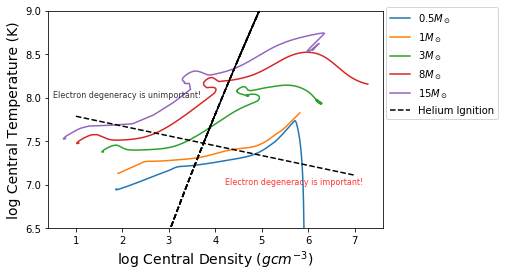

In [129]:
plt.figure()
mpt5.plottcpc()
m1.plottcpc()
m3.plottcpc()
m8.plottcpc()
m15.plottcpc()
plt.xlabel('log Central Density ($g cm^{-3}$)', fontsize = 14)
plt.ylabel('log Central Temperature (K)', fontsize = 14)
x = np.linspace(1,7,1000)
tc = 7.9-(.113*x)
plt.plot(x,tc, 'k--', label = 'Helium Ignition')
plt.ylim(6.5,9)
plt.text(0.5, 8, 'Electron degeneracy is unimportant!', fontsize = 8, alpha = 0.8)
plt.text(4.2, 7, 'Electron degeneracy is important!', color = 'r', fontsize = 8, alpha = 0.8)

plt.legend(loc = (1.01,.5))

Both the 8 and 15 solar mass stars will ignite helium explosively. This is evident in that it is only above the cutoff line that helium ignites in the core of these stars. In less massive stars, the core temperature never gets hot enough for this process to happen, because there isn't enough pressure for the temperature to get that high. 